In [1]:
from keras.models import Model, load_model
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from model import *
import pickle

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# load in test set 
X_test = pickle.load(open('X_validation.pickle','rb'))
y_true = pickle.load(open('y_validation.pickle','rb'))

In [4]:
# load model
model_ = load_model('my_unet.h5',custom_objects={'mean_iou':mean_iou})

In [5]:
# predict
y_pred = model_.predict(X_test, verbose=1)

70/70 [==============================] - 18s 255ms/step


In [7]:
# save y_pred
with open('y_pred.pickle','wb') as f:
    pickle.dump(y_pred,f)

In [ ]:
# KEY
# imgno - original
# imgn - mask
# imgnp - predicted
# imgb - overlay

# Below, I am sampling various images

RGB Channels 
 red: ground truth 
 green: predicted 
 blue: black (True Negative) 

Colors On Displayed Img 
 red: False Negative 
 yellow: True Positive 
 green: False Positive 
 black: True Negative


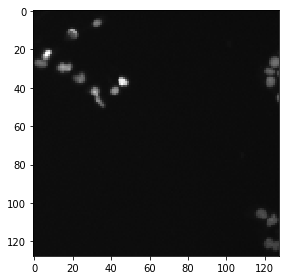

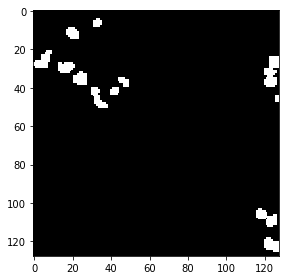

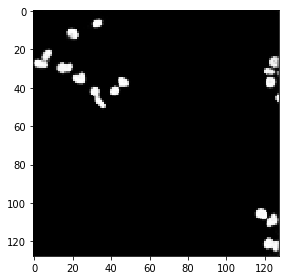

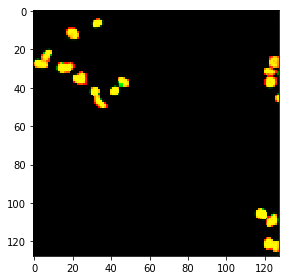

In [31]:
img2o = X_test[66]
img2 = y_true[66]
img2p = y_pred[66]

img2b = np.zeros((128,128,3))
img2b[:,:,0] = img2[:,:,0]
img2b[:,:,1] = img2p[:,:,0]

print('RGB Channels','\n',
    'red: ground truth','\n',
     'green: predicted', '\n',
     'blue: black (True Negative)','\n')

print('Colors On Displayed Img','\n',
    'red: False Negative','\n',
     'yellow: True Positive','\n',
     'green: False Positive','\n',
     'black: True Negative')

imshow(img2o)
plt.show()

imshow(np.squeeze(img2))
plt.show()

imshow(np.squeeze(img2p))
plt.show()

imshow(img2b)
plt.show()

In [76]:
def iou(img1, img2):
    intersection = np.sum(img1 * img2)
    union = np.sum(img1+img2) - intersection

    #if not union:
        #return 1

    return intersection / union

In [43]:
iou(img2,img2p)

0.72010267

In [44]:
type(y_pred[5])
type(X_test[5])
print(y_pred.shape, X_test.shape)

(70, 128, 128, 1) (70, 128, 128, 3)


In [77]:
iou_values = []

for i in range(len(y_true)):
    
    iou_ = iou(y_true[i], y_pred[i])
    iou_values.append(iou_)

RGB Channels 
 red: ground truth 
 green: predicted 
 blue: black (True Negative) 

Colors On Displayed Img 
 red: False Negative 
 yellow: True Positive 
 green: False Positive 
 black: True Negative


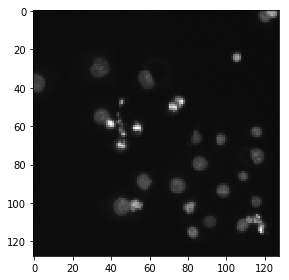

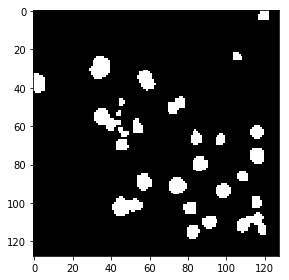

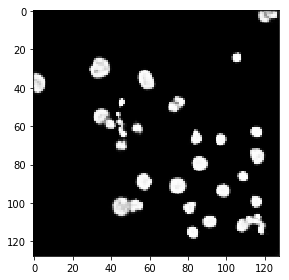

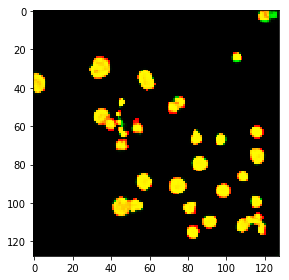

In [69]:
img3o = X_test[50]
img3 = y_true[50]
img3p = y_pred[50]

img3b = np.zeros((128,128,3))
img3b[:,:,0] = img3[:,:,0]
img3b[:,:,1] = img3p[:,:,0]

print('RGB Channels','\n',
    'red: ground truth','\n',
     'green: predicted', '\n',
     'blue: black (True Negative)','\n')

print('Colors On Displayed Img','\n',
    'red: False Negative','\n',
     'yellow: True Positive','\n',
     'green: False Positive','\n',
     'black: True Negative')

imshow(img3o)
plt.show()

imshow(np.squeeze(img3))
plt.show()

imshow(np.squeeze(img3p))
plt.show()

imshow(img3b)
plt.show()

In [2]:
# Uncomment and execute to see all images for validaiton set

#for i in range(len(X_test)):
    #print(i)
    #imshow(X_test[i])
    #plt.show()

In [1]:
# Uncomment and execute to see all masks for validaiton set

#for i in range(len(y_true)):
    #print(i)
    #imshow(np.squeeze(y_true[i]))
    #plt.show()

RGB Channels 
 red: ground truth 
 green: predicted 
 blue: black (True Negative) 

Colors On Displayed Img 
 red: False Negative 
 yellow: True Positive 
 green: False Positive 
 black: True Negative


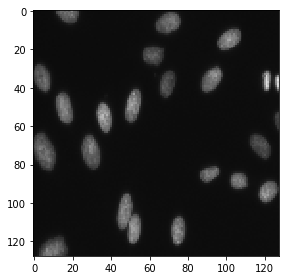

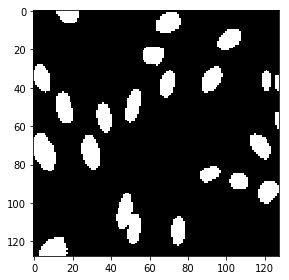

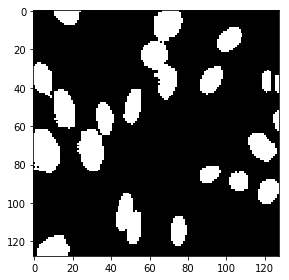

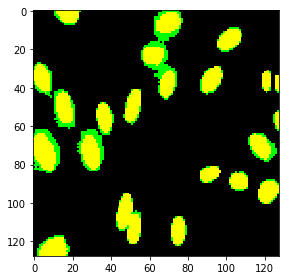

In [61]:
img4o = X_test[64]
img4 = y_true[64]
img4p = y_pred[64]
img4p = img4p > (np.mean(img4p))

img4b = np.zeros((128,128,3))
img4b[:,:,0] = img4[:,:,0]
img4b[:,:,1] = img4p[:,:,0]

print('RGB Channels','\n',
    'red: ground truth','\n',
     'green: predicted', '\n',
     'blue: black (True Negative)','\n')

print('Colors On Displayed Img','\n',
    'red: False Negative','\n',
     'yellow: True Positive','\n',
     'green: False Positive','\n',
     'black: True Negative')

imshow(img4o)
plt.show()

imshow(np.squeeze(img4))
plt.show()

imshow(np.squeeze(img4p))
plt.show()

imshow(img4b)
plt.show()

In [82]:
img4 = np.squeeze(img4)
img4p = np.squeeze(img4p)

In [83]:
plt.imsave('64o.png',img4o)
plt.imsave('64.png',img4)
plt.imsave('64p.png',img4p)
plt.imsave('64b.png',img4b)

In [16]:
z = np.squeeze(y_true[10])
plt.imsave('y_true11.png',z,cmap='gray')

In [18]:
y = np.squeeze(y_true[13])
plt.imsave('y_true13.png',y,cmap='gray')

x = X_test[13]
plt.imsave('X_test13.png',x)

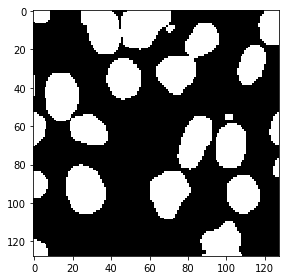

In [22]:
y_true[0]
imshow(np.squeeze(y_true[0]))
plt.show()

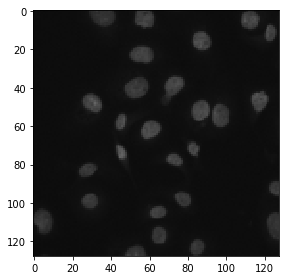

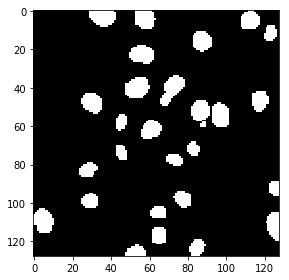

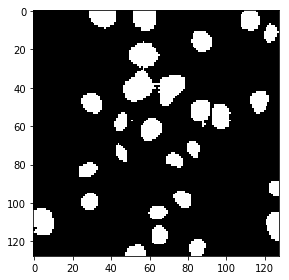

In [42]:
imgzo = X_test[47]
imshow(imgzo)
plt.show()

imgz = y_true[47]
imshow(np.squeeze(imgz))
plt.show()

imgzp = y_pred[47]
imgzp = imgzp > np.mean(imgz)
imshow(np.squeeze(imgzp))
plt.show()

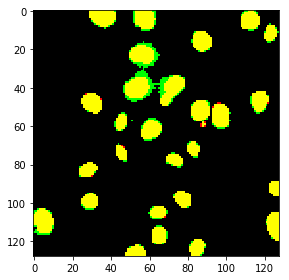

In [41]:
imgzb = np.zeros((128,128,3))
imgzb[:,:,0] = imgz[:,:,0]
imgzb[:,:,1] = imgzp[:,:,0]

imshow(imgzb)
plt.show()

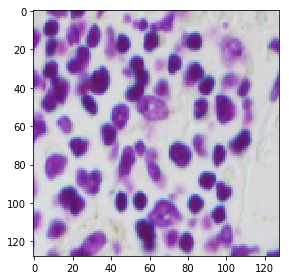

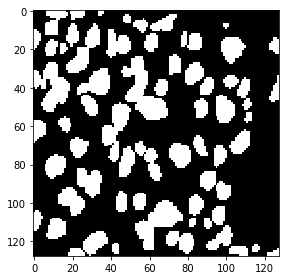

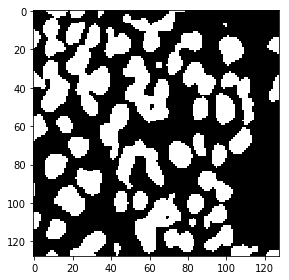

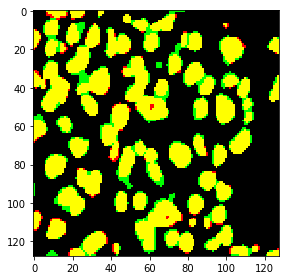

In [70]:
imgyo = X_test[23]
imshow(imgyo)
plt.show()

imgy = y_true[23]
imshow(np.squeeze(imgy),cmap='gray')
plt.show()

imgyp = y_pred[23]
imgyp = imgyp > np.mean(imgyp)
imshow(np.squeeze(imgyp),cmap='gray')
plt.show()

imgyb = np.zeros((128,128,3))
imgyb[:,:,0] = imgy[:,:,0]
imgyb[:,:,1] = imgyp[:,:,0]
imshow(imgyb)
plt.show()

In [71]:
imgy = np.squeeze(imgy)
imgyp = np.squeeze(imgyp)

In [73]:
plt.imsave('imgyo.png',imgyo)
plt.imsave('imgy.png',imgy,cmap='gray')
plt.imsave('imgyp.png',imgyp,cmap='gray')
plt.imsave('imgyb.png',imgyb)

In [79]:
type(iou_values)

list

In [84]:
import pandas as pd
import seaborn as sns

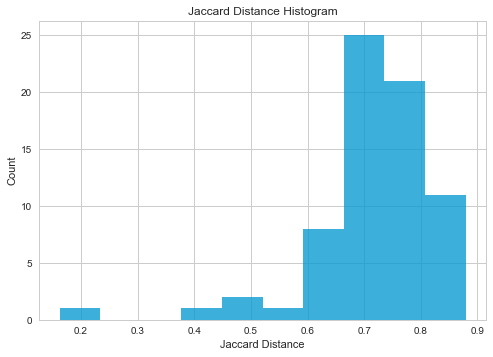

In [130]:
plt.hist(iou_values, color='#0c9bd3', alpha=0.8)
plt.xlabel('Jaccard Distance')
plt.ylabel('Count')
plt.title('Jaccard Distance Histogram')
plt.show()